In [1]:
# Data set

#A
a =[0, 0, 1, 1, 0, 0,
    0, 1, 0, 0, 1, 0,
    1, 1, 1, 1, 1, 1,
    1, 0, 0, 0, 0, 1,
    1, 0, 0, 0, 0, 1]

#B
b =[0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 0]

#C
c =[0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 1, 1, 1, 0]


In [2]:
# Labels
y = [[1,0,0],
     [0,1,0],
     [0,0,1]]

In [3]:
import numpy as np
import matplotlib.pyplot as plt

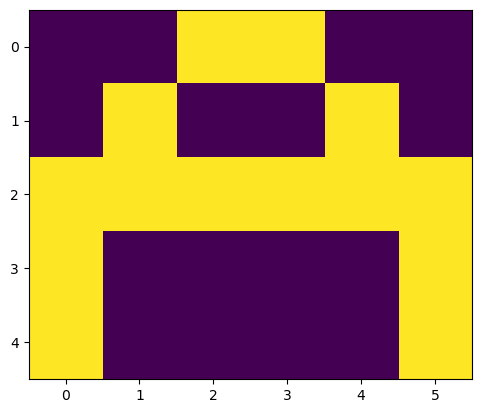

In [4]:
#visualize the data
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [5]:
# Convert data and labels into numpy array
x = [np.array(a).reshape(1,30), np.array(b).reshape(1,30), np.array(c).reshape(1,30)]
y = np.array(y)

In [6]:
#input (1,30) 

#hidden (1,5) 

#output (3,3)

In [7]:
# Activation function

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
# Feed forward function

def f_forward(x, w1, w2):
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    
    #output layer
    
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return a2


In [9]:
# Initialize the weights

def generate_wt(x, y):
    l = []
    for i in range(x * y):
        l.append(np.random.randn())
    return np.array(l).reshape(x, y)

In [10]:
# Loss function

def loss(out, Y):
    s = (np.square(out - Y))
    S = np.sum(s) / len(Y)
    return S


In [11]:
# Backpropagation

def back_prop(x, y, w1, w2, alpha):
    
    #hidden
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    
    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    d2 = (a2 - y)
    d1 = np.multiply((w2.dot(d2.transpose())).transpose(), (np.multiply(a1, 1 - a1)))
    
    #gradient
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)

    w1 = w1 - (alpha * w1_adj)
    w2 = w2 - (alpha * w2_adj)

    return w1, w2

In [12]:
def train(x, Y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    loss_list = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append(loss(out, Y[i]))
            w1, w2 = back_prop(x[i], Y[i], w1, w2, alpha)
        print("Epochs:", j + 1, "acc:", (1 - (sum(l) / len(x))) * 100)
        acc.append((1 - (sum(l) / len(x))) * 100)
        loss_list.append(sum(l) / len(x))
    return acc, loss_list, w1, w2


In [13]:
# Prediction function

def predict(x, w1, w2):
    out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(out[0])):
        if maxm < out[0][i]:
            maxm = out[0][i]
            k = i
    if k == 0:
        print("Image is of letter A")
    elif k == 1:
        print("Image is of letter B")
    else:
        print("Image is of letter C")
    plt.imshow(x.reshape(5, 6))
    plt.show()

In [14]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n", w2)

[[-0.55805011  0.34448948 -0.43598347 -0.05873826  2.10860174]
 [ 0.3699681   0.61858179  1.44957443 -1.7340415   0.47187413]
 [-0.06175278  0.96473147 -1.02427366  0.41531979  0.03743507]
 [-0.42163571  0.95462243  1.52117354 -0.47417062  1.38622315]
 [ 0.83798751 -0.13129604 -0.76014852 -1.66223371 -0.78226707]
 [ 1.18183399  0.99914685  0.43224685  0.56138211  1.05962227]
 [ 1.01236098  2.29318948  0.87982722  0.16952471 -1.25941371]
 [-0.63631834  0.83371652  0.33892317  0.7278869  -2.30056844]
 [ 0.28877495  1.93807174 -0.71451018 -0.55214703  0.81812478]
 [ 0.75663493  0.04395708 -0.99864812 -0.34230629  1.37972919]
 [ 0.4484086  -2.20520261  1.45016695  1.64312685 -0.23253728]
 [-0.83317284  0.4955211  -0.21565905  0.15486879  1.03468366]
 [ 0.7344943   0.02432451  0.40335116  1.39038336  0.31352667]
 [-1.25847405 -2.92117072 -0.84395979 -0.07813322  0.10701489]
 [-1.31763875 -0.0679499   1.10612732 -0.98539789 -0.16878581]
 [ 0.47525277 -0.0630128  -2.41240933  0.70958248  2.44

In [15]:
acc, loss_list, w1, w2 = train(x, y, w1, w2, 0.1, 100)

Epochs: 1 acc: 57.10492143351835
Epochs: 2 acc: 62.502386921399335
Epochs: 3 acc: 66.76215691131829
Epochs: 4 acc: 70.13498554848437
Epochs: 5 acc: 72.84871442439614
Epochs: 6 acc: 75.10273228673627
Epochs: 7 acc: 77.05770727986716
Epochs: 8 acc: 78.81927632757878
Epochs: 9 acc: 80.41341182098304
Epochs: 10 acc: 81.80287645111554
Epochs: 11 acc: 82.96456997170291
Epochs: 12 acc: 83.92584632326523
Epochs: 13 acc: 84.73473110845904
Epochs: 14 acc: 85.4332711459804
Epochs: 15 acc: 86.0516272043952
Epochs: 16 acc: 86.61022592843703
Epochs: 17 acc: 87.12282301797987
Epochs: 18 acc: 87.59882590333895
Epochs: 19 acc: 88.04483485681193
Epochs: 20 acc: 88.46562487912473
Epochs: 21 acc: 88.86476474202176
Epochs: 22 acc: 89.24500862564575
Epochs: 23 acc: 89.60854652763169
Epochs: 24 acc: 89.95716629155045
Epochs: 25 acc: 90.29235932098926
Epochs: 26 acc: 90.61538968368814
Epochs: 27 acc: 90.92733908573786
Epochs: 28 acc: 91.22913593412103
Epochs: 29 acc: 91.52157411940497
Epochs: 30 acc: 91.80532

In [16]:
import numpy as np 
import matplotlib.pyplot as plt1 

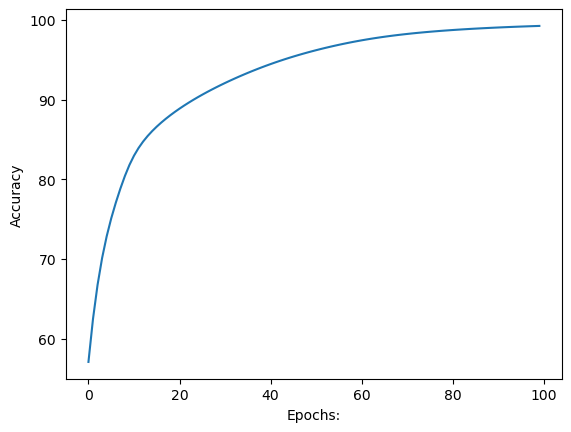

In [17]:
# Plotting accuracy
plt1.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()


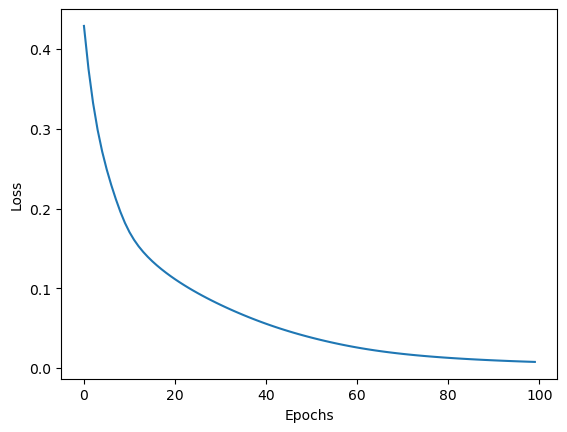

In [18]:
# Plot loss
plt1.plot(loss_list)
plt.ylabel('Loss')
plt.xlabel("Epochs")
plt.show()


In [19]:
print(w1, "\n", w2)

[[-0.55805011  0.34448948 -0.43598347 -0.05873826  2.10860174]
 [-0.37334108  0.89778115  1.50044131 -1.77645402  0.35929954]
 [-0.08828859  1.12985547 -0.98316475  0.36887744 -0.30823037]
 [-0.44817152  1.11974643  1.56228246 -0.52061296  1.0405577 ]
 [ 0.09467833  0.14790332 -0.70928164 -1.70464623 -0.89484165]
 [ 1.18183399  0.99914685  0.43224685  0.56138211  1.05962227]
 [ 1.01236098  2.29318948  0.87982722  0.16952471 -1.25941371]
 [-0.66285415  0.99884051  0.38003209  0.68144456 -2.64623388]
 [ 0.28877495  1.93807174 -0.71451018 -0.55214703  0.81812478]
 [ 0.75663493  0.04395708 -0.99864812 -0.34230629  1.37972919]
 [ 0.77024296 -2.39077181  0.77782582  2.05734212 -0.07404769]
 [-0.83317284  0.4955211  -0.21565905  0.15486879  1.03468366]
 [ 1.45126767 -0.08975085  0.3935932   1.38635353  0.08043582]
 [-1.28500986 -2.75604673 -0.80285087 -0.12457557 -0.23865055]
 [-0.99580439 -0.2535191   0.4337862  -0.57118262 -0.01029622]
 [ 0.79708713 -0.248582   -3.08475046  1.12379775  2.60

Image is of letter A


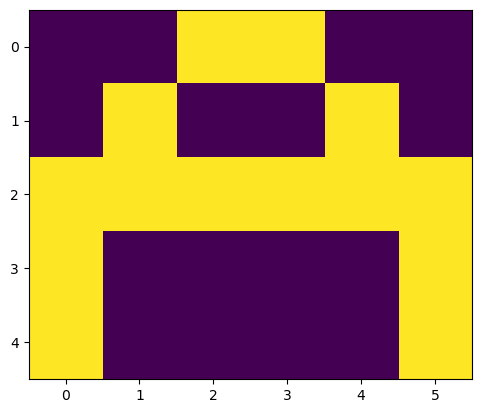

In [20]:
predict(x[0], w1, w2)

Image is of letter B


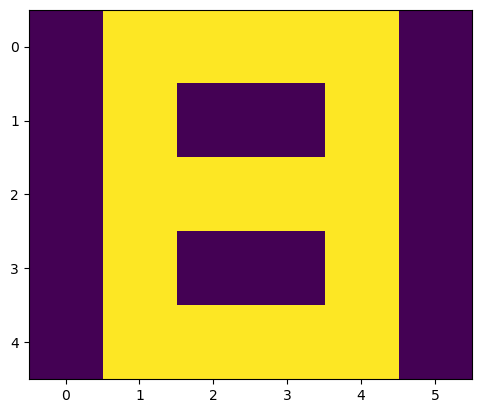

In [21]:
predict(x[1], w1, w2)

Image is of letter C


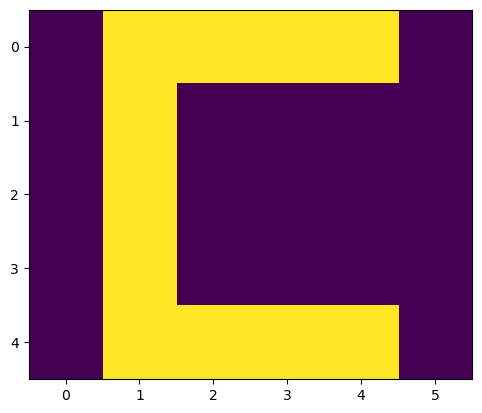

In [22]:
predict(x[2], w1, w2)